In [58]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [59]:
import pandas as pd

df = pd.read_csv('data/score.csv')
df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2]

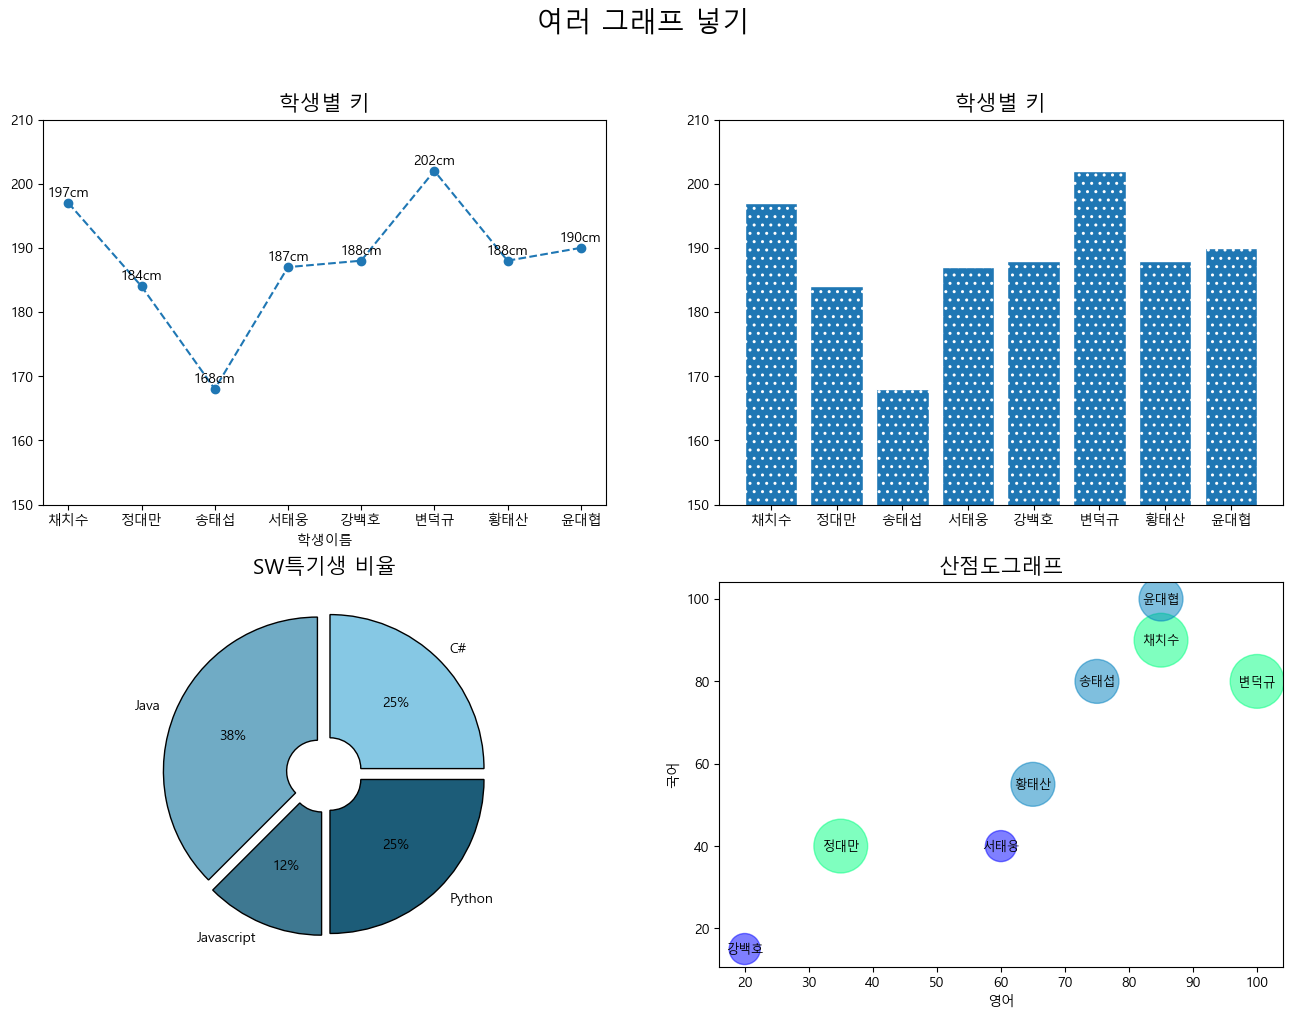

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(16, 11))  #2x2
fig.suptitle('여러 그래프 넣기', size=20)

#첫번째 그래프 - 꺾은선 그래프
axs1 = axs[0,0]
axs1.plot(df['이름'], df['키'], marker='o', ls='--')
axs1.set_title('학생별 키', size=15)
axs1.set_xlabel('학생이름\n')
for idx, h in enumerate(df['키']):
    axs1.text(idx, h+1, f'{h}cm', ha='center')
axs1.set_ylim(150, 210)

#두번째 그래프 - 막대그래프
axs2 = axs[0,1]
axs2.set_title('학생별 키', size=15)
axs2.bar(df['이름'], df['키'], hatch='..', ec='w')
axs2.set_ylim(150, 210)

#세번째 그래프 - 원 그래프
axs3 = axs[1, 0]
axs3.set_title('SW특기생 비율', size=15)
group = df.groupby('SW특기').size()
colors = ["#86C8E4","#70ABC5","#3E7891","#1C5C78"]
axs3.pie(group.values, labels=group.index, autopct='%.0f%%', explode=[0.05]*len(group), wedgeprops={'width':0.8, 'edgecolor':'black'}, colors=colors)

#네번째 그래프 - 산점도 그래프
axs4 = axs[1,1]
axs4.set_title('산점도그래프', size=15)
axs4.scatter(df['영어'], df['국어'], sizes=df['학년']*500, c=df['학년'], cmap='winter', alpha=0.5)
axs4.set_xlabel('영어')
axs4.set_ylabel('국어')
for idx in range(len(df)):
    y = df.loc[idx, '국어']
    x = df.loc[idx, '영어']
    name = df.loc[idx, '이름']
    axs4.text(x, y-1, name, ha='center', size=9)

plt.show()

In [61]:
df = pd.read_csv('data/score.csv')
df['평균'] = df.apply(lambda row: row['국어':'사회'].mean(), axis=1)
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
0,1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
1,2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
4,5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
6,7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0


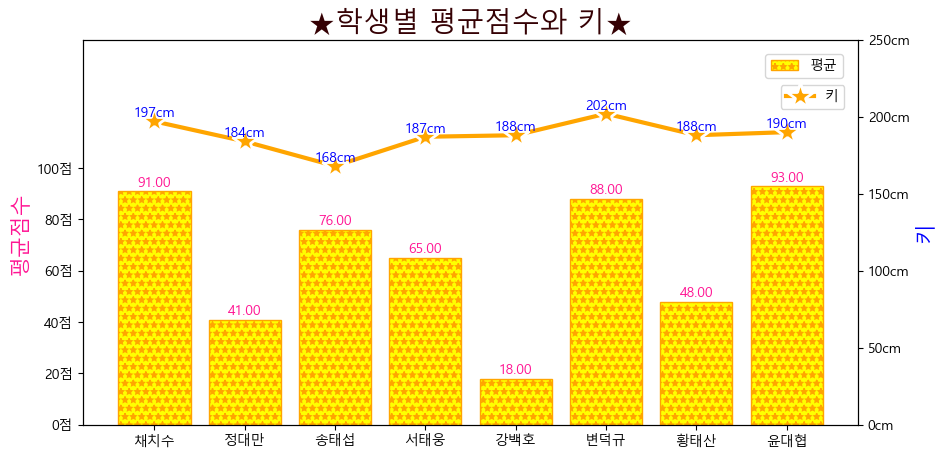

In [132]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('★학생별 평균점수와 키★', size=20, color="#350104")

ax.bar(df['이름'], df['평균'], color='yellow', ec='orange', hatch='**', label = '평균')
ax.set_ylim(0, 150)
yticks = [y for y in range(0,101,20)]
ax.set_yticks(yticks, [f'{y}점' for y in yticks])

ax.set_ylabel('평균점수', c='deeppink', size = 15)
for idx, y in enumerate(df['평균']):
    ax.text(idx, y+2, f'{y:.2f}', ha='center', c='deeppink')

ax2 = ax.twinx()
ax2.plot(df['이름'], df['키'], color='orange', marker='*', ms = 20, mec='w', lw=3, mew = 2, label='키')
ax2.set_ylim(0, 250)
ax2.set_ylabel('키', c='blue', size = 15)
yticks = [y for y in range(0,251,50)]
ax2.set_yticks(yticks, [f'{y}cm' for y in yticks])

for idx, t in enumerate(df['키']):
    ax2.text(idx, t+3, f'{t}cm', ha='center', c='blue')

ax.legend(loc=(0.88, 0.9))
ax2.legend(loc=(0.9, 0.82))

plt.savefig('data/평균점수와키.png')
plt.show()